In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zomato-eda/zomato.csv


OBJECTIVE: To make an EDA report and analyse this zomato data

WORK MAP:

Find out if there are Duplicates value in primary key i.e., res_id, and drop it.



Find out the null values and operate them if applicable.

Analyse the individual columns and then corelate one column with others.

Visualization: By using different graphs make the analyses more effective and easy to understand.

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
zomato=pd.read_csv('/kaggle/input/zomato-eda/zomato.csv')
zomato

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [4]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [5]:
df=zomato.copy()
df.shape

(51717, 17)

In [6]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [7]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [8]:
df.describe() 

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [9]:
df.rename({'approx_cost(for two people)':'approx_cost','listed_in(type)':'listed_in','listed_in(city)':'city'},axis=1,inplace=True)

In [10]:
df.drop(['phone','url','address'],axis=1,inplace = True )

here i am fillna function using nan values will be replace to other word 

In [11]:
df=df.fillna({'dish_liked':'no_data','rate':'no_rating'})

In [12]:
df['online_order'].unique()

array(['Yes', 'No'], dtype=object)

In [13]:
df['book_table'].unique()


array(['Yes', 'No'], dtype=object)

In [14]:
df['rest_type'].value_counts().head()

Quick Bites       19132
Casual Dining     10330
Cafe               3732
Delivery           2604
Dessert Parlor     2263
Name: rest_type, dtype: int64

In [15]:
df['location'].value_counts().head()

BTM                      5124
HSR                      2523
Koramangala 5th Block    2504
JP Nagar                 2235
Whitefield               2144
Name: location, dtype: int64

Here top rateing and hotel names shown

In [16]:
 df.loc[(df['rate']=='4.9 /5')|(df['rate']=='4.9/5'),['name','rate']].drop_duplicates(keep='first').head()

,name,rate
3921,Byg Brewski Brewing Company,4.9/5
5153,Belgian Waffle Factory,4.9/5
6746,Flechazo,4.9/5
7118,Punjab Grill,4.9/5
8260,AB's - Absolute Barbecues,4.9/5


In [17]:
def area_like_meal(location='BTM'):
    a=df[df['location']==location]
    s = []
    for i in a['dish_liked'].str.split(','):
        for j in i:
            s.append(j)
    uni_dish=list(set(s))
    c=0
    name=[]
    total_no=[]
    for i in uni_dish:
        for j in s:
            if i==j:
                c+=1
        name.append(i)
        total_no.append(c)
    dic={'meal':name,'total_count':total_no}
    meal=pd.DataFrame(dic)
    all_data=meal.nlargest(4,['total_count'])
    sns.barplot(x='meal', y='total_count',data=all_data)
    plt.show()

Data Visualization

we can see a top 5 area in the most demandable 

BTM


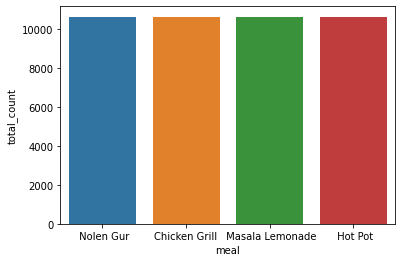

HSR


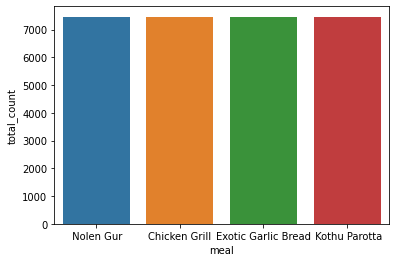

Koramangala 5th Block


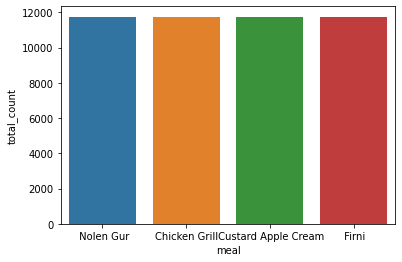

JP Nagar


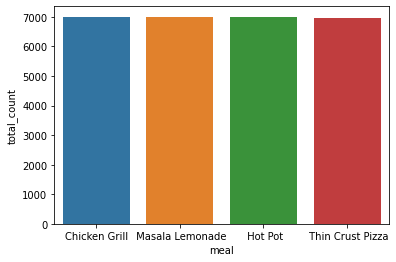

Whitefield


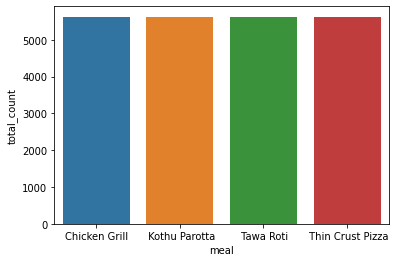

In [18]:
for i in df['location'].value_counts().head().index:
    print(i)
    area_like_meal(location=i)

here we are seen how much hotels are taken online services

<AxesSubplot:>

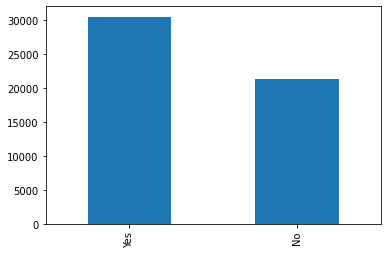

In [19]:
df.online_order.value_counts().plot(kind='bar')

How many hotels provide online booking facility

<AxesSubplot:>

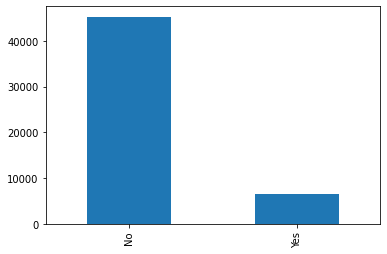

In [20]:
df['book_table'].value_counts().plot(kind='bar')

top location by a votes

<AxesSubplot:xlabel='location'>

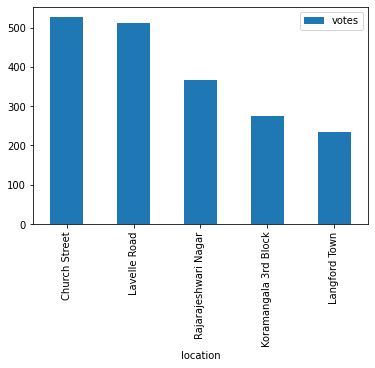

In [21]:
df.groupby('location').agg({'votes':'median'}).sort_values('votes',ascending=False).head().plot(kind='bar')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='listed_in', ylabel='count'>

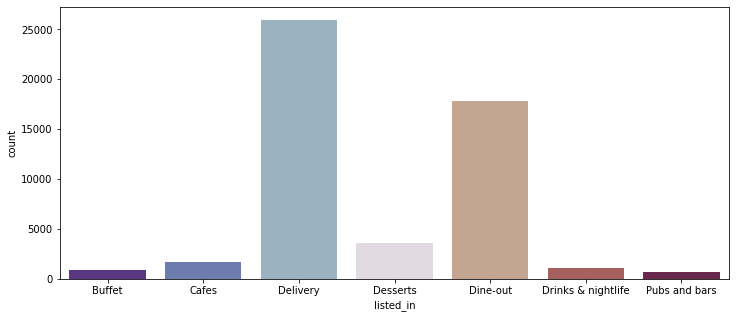

In [22]:
plt.figure(figsize=(12,5))
sns.countplot(df["listed_in"],palette='twilight_shifted')

total count show in rest_type

<AxesSubplot:xlabel='count', ylabel='rest_type'>

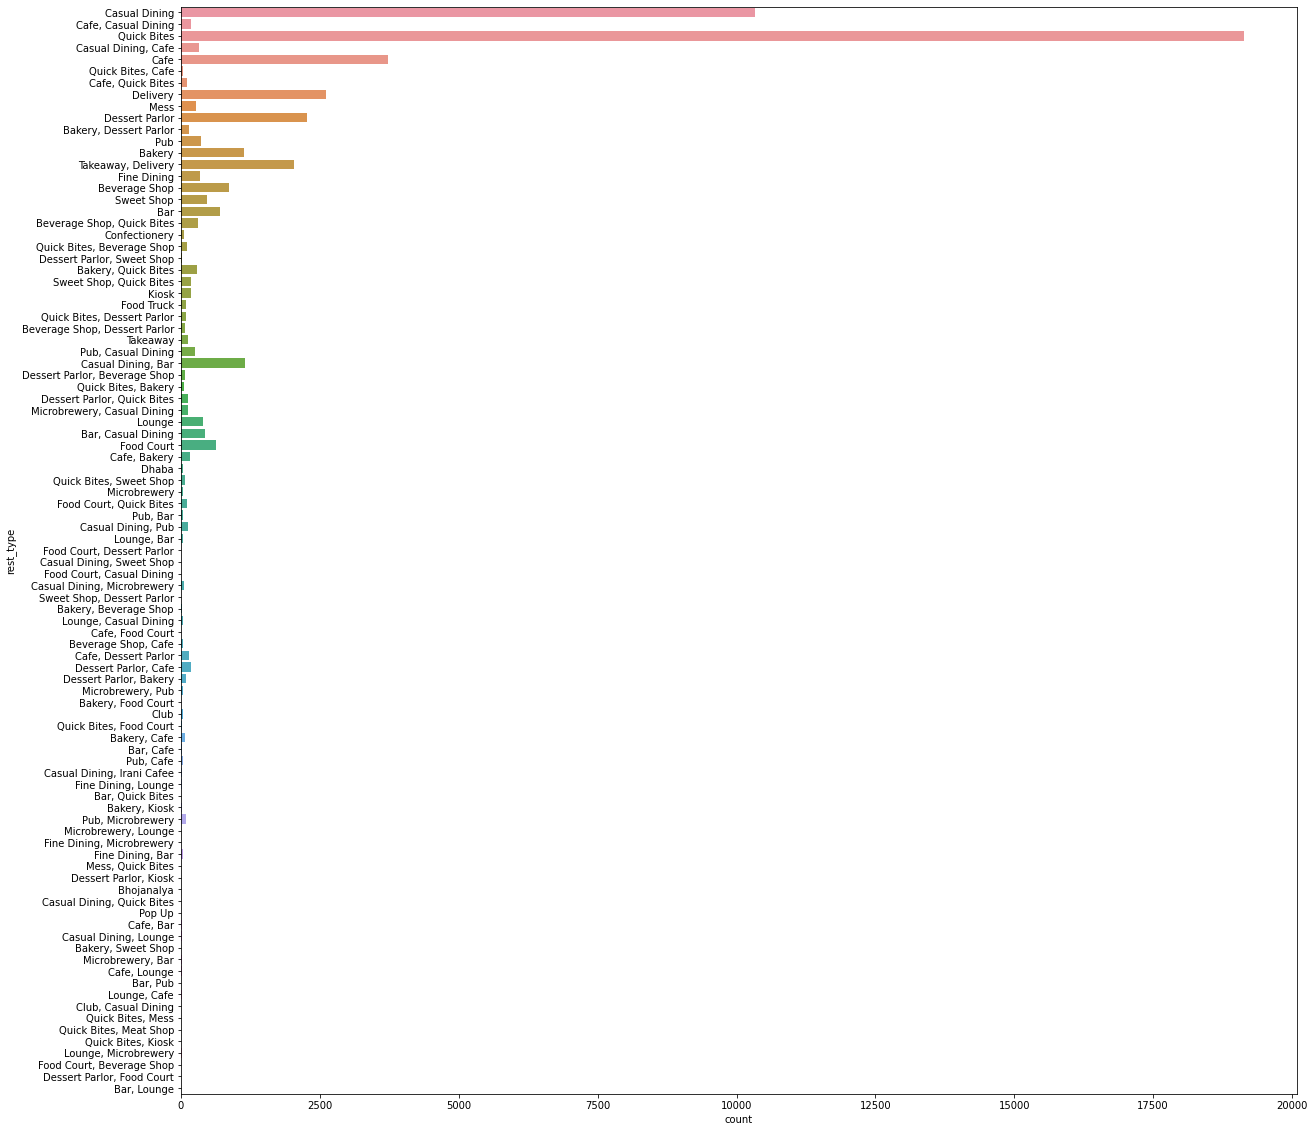

In [23]:
plt.figure(figsize=[20,20])
sns.countplot(y='rest_type', data=df)

Most famous restaurant considering parameter like rate,vote,cost


<AxesSubplot:ylabel='rest_type'>

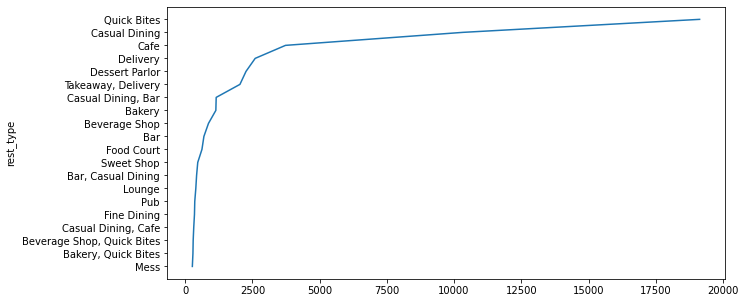

In [24]:
q=df.groupby('rest_type')['rate'].count()
plt.figure(figsize=[10,5])
tg=q.sort_values(ascending=False).head(20)
tg.values
sns.lineplot(y=tg.index,x=tg.values)

<AxesSubplot:xlabel='count', ylabel='approx_cost'>

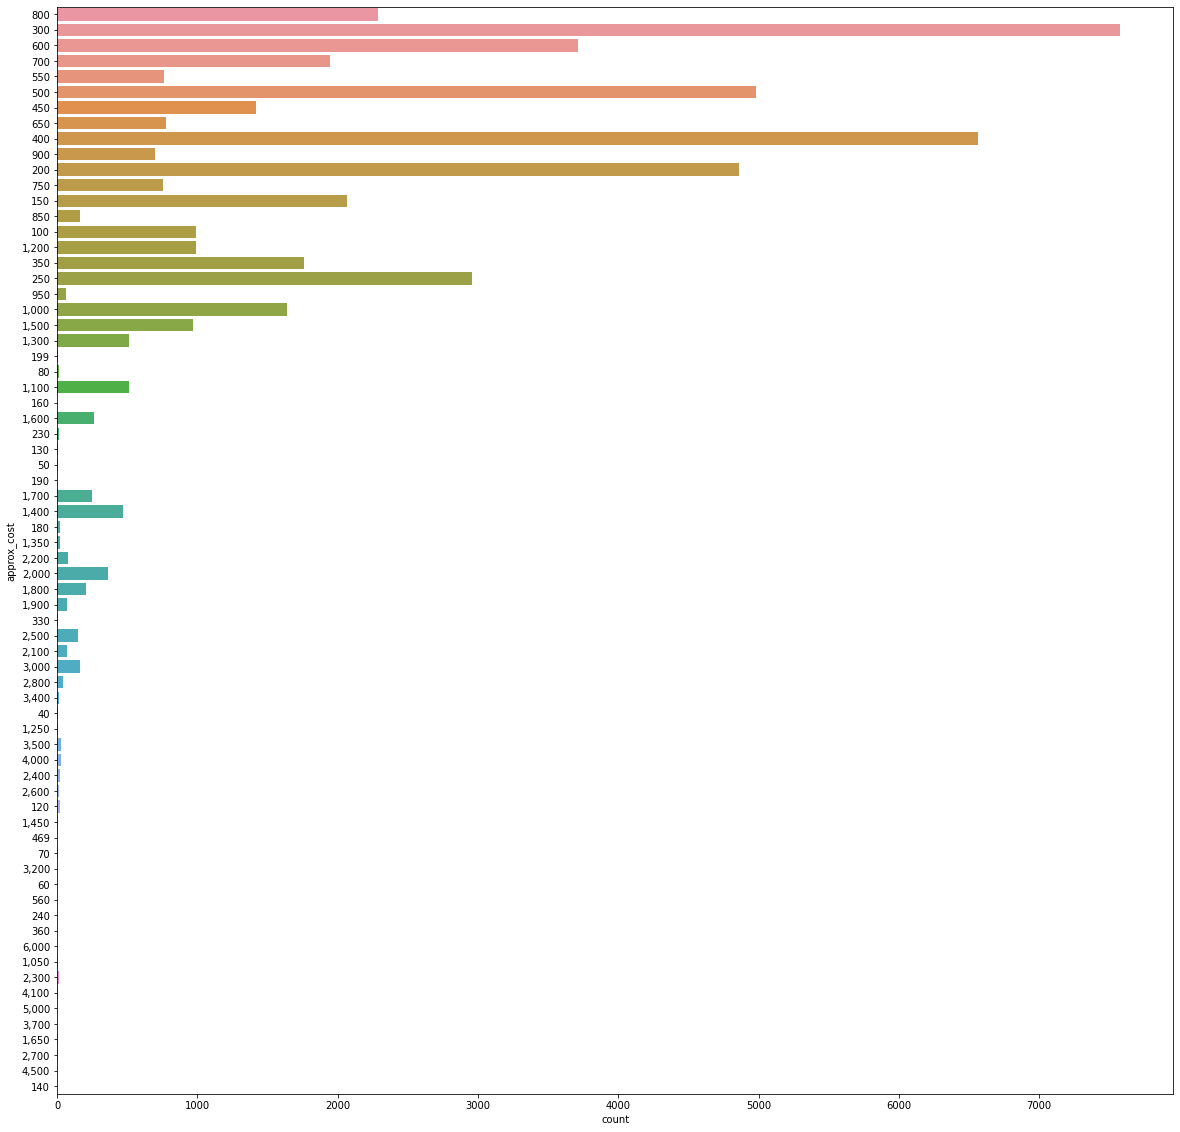

In [25]:
plt.figure(figsize=[20,20])
sns.countplot(y='approx_cost', data=df)